Are there any notable differences in the average housing prices among clusters of zip code groups within specific ranges?

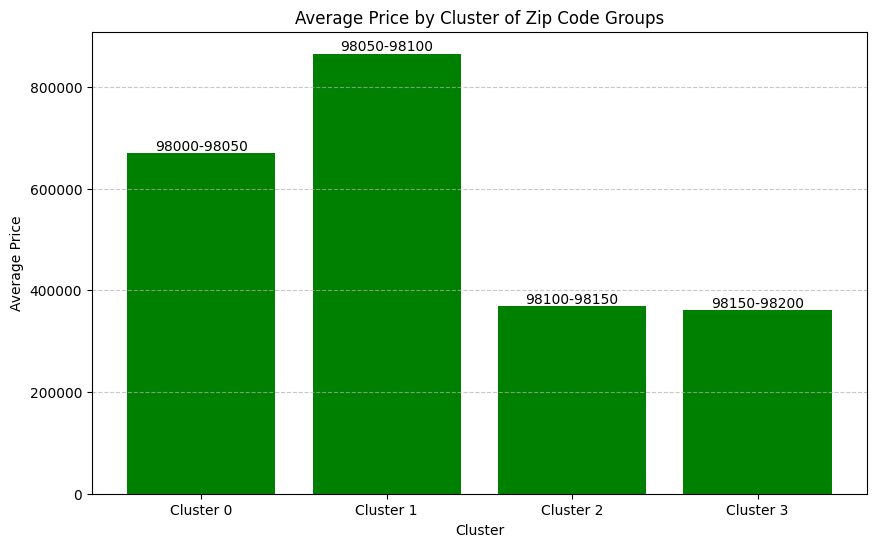

In [51]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Define the ranges of zip codes
zip_ranges = [
    (98000, 98050),
    (98050, 98100),
    (98100, 98150),
    (98150, 98200)
]

# Assign each zip code to a group based on the ranges
def assign_group(zipcode):
    for i, (start, end) in enumerate(zip_ranges):
        if start <= zipcode < end:
            return i
    return -1

df['zip_group'] = df['zipcode'].apply(assign_group)

# Filter out zip codes that don't belong to any group
filtered_df = df[df['zip_group'] != -1]

# Extract relevant columns (zip group and price)
X = filtered_df[['zip_group', 'price']]

# Normalize the data
X_normalized = (X - X.mean()) / X.std()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_normalized)

# Add cluster labels to the original DataFrame
filtered_df['cluster'] = kmeans.labels_

# Calculate the average price for each cluster
avg_price_by_cluster = filtered_df.groupby('cluster')['price'].mean().reset_index()

# Define the zip code ranges for each cluster
zip_code_ranges = [
    '98000-98050',
    '98050-98100',
    '98100-98150',
    '98150-98200'
]

# Visualize the average price for each cluster with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price_by_cluster['cluster'], avg_price_by_cluster['price'], color='green')
plt.xlabel('Cluster')
plt.ylabel('Average Price')
plt.title('Average Price by Cluster of Zip Code Groups')
plt.xticks(avg_price_by_cluster['cluster'], labels=[f'Cluster {i}' for i in avg_price_by_cluster['cluster']])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), zip_code_ranges[i],
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()
